<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/v2/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [575]:
# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns




In [576]:
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 15)

# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [577]:
 #  YYYY-mm-dd
fechaInicio = "2020-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [578]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX", "ICPT"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV", "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "V", "DIS", "PFE", "KO"]

''' NASDAQ, más rendimiento a mayor riesgo'''
activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"] # ESTAAAA

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']


''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

8

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS.
(Columna 'Adj Close') desde Yahoo Finance.

In [579]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
#dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame,
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  8 of 8 completed


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-01-02,334.429993,49.099998,294.239990,54.760342,NaN,31.850000,329.809998,59.754211
2020-01-03,331.809998,48.599998,290.850006,54.094296,NaN,31.639999,325.899994,58.797787
2020-01-06,333.709991,48.389999,290.820007,53.941280,NaN,31.690001,335.829987,59.044376
2020-01-07,333.390015,48.250000,290.089996,53.041203,NaN,31.844999,330.750000,59.759197
2020-01-08,337.869995,47.830002,292.660004,53.077209,NaN,31.910000,339.260010,59.871281
...,...,...,...,...,...,...,...,...
2023-06-14,479.529999,127.330002,299.989990,35.580002,6.40,58.480000,440.859985,429.970001
2023-06-15,490.910004,124.239998,297.829987,35.820000,6.59,58.799999,445.269989,426.529999
2023-06-16,495.179993,120.080002,297.480011,36.369999,6.48,58.450001,431.959991,426.920013


In [580]:
dataSet.max()

ADBE    688.369995
AMD     161.910004
BIIB    414.709991
INTC     63.348778
LCID     58.049999
MNST     59.939999
NFLX    691.690002
NVDA    438.079987
dtype: float64

### Gráfico de precios de períodos

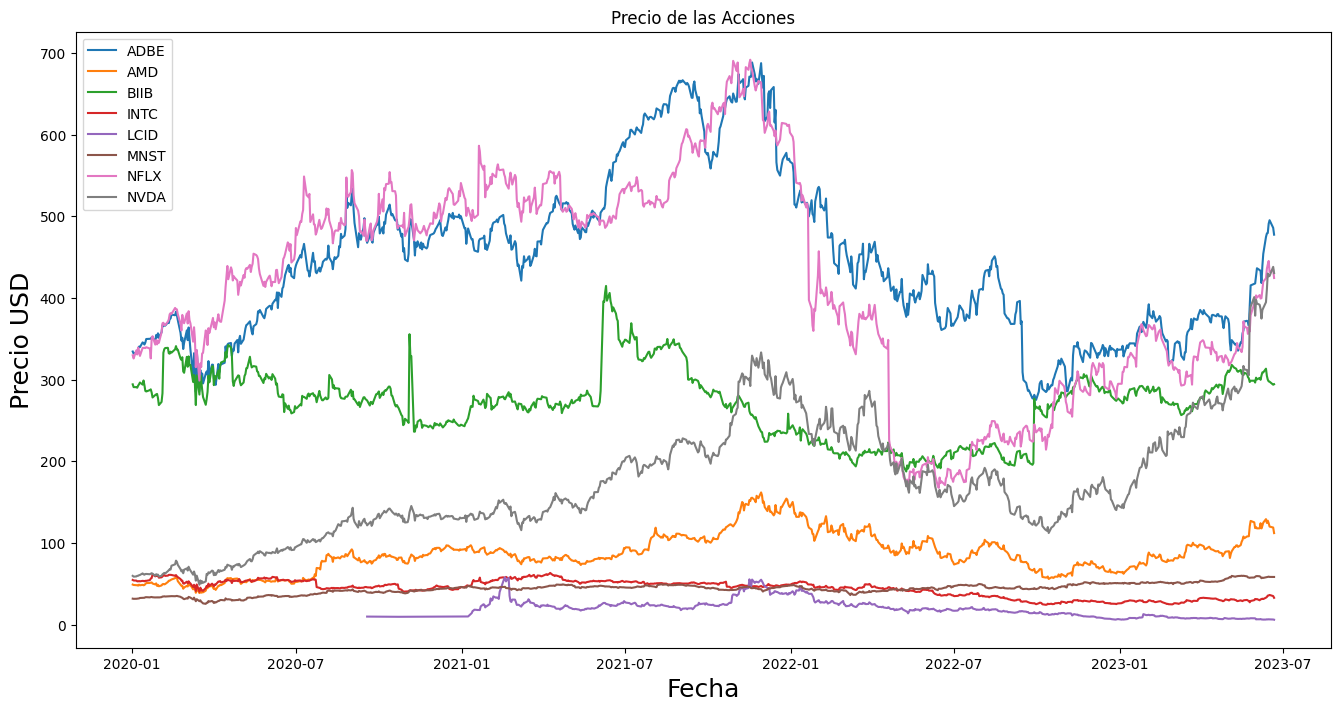

In [581]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [582]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento.head() * 100

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-09-21,1.730302,4.017085,-2.251539,-0.340743,-0.303344,-0.772250,3.700318,2.690878
2020-09-22,2.342104,-0.307936,1.662327,0.462583,0.202844,1.084468,0.783832,0.962678
2020-09-23,-3.367021,-3.822386,-0.205308,-2.262245,-0.303641,-1.817496,-4.185929,-4.067192
2020-09-24,-0.578244,1.458579,-0.793535,0.696423,-0.812182,0.269956,0.524851,1.849686
2020-09-25,2.589430,2.954363,1.199819,1.586648,0.409416,1.012822,2.071535,4.257772


### Calculo de esperanza, varianza y desvío estandar

In [583]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

<ipython-input-583-92ca6a712313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
<ipython-input-583-92ca6a712313>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Esperanza,0.030713,0.110930,0.062683,-0.021381,0.109698,0.068152,0.039137,0.240467
Varianza,0.000546,0.001056,0.001174,0.000518,0.003710,0.000232,0.001018,0.001169
STD,2.336885,3.249589,3.426290,2.276531,6.090991,1.522900,3.189991,3.419649


### Distribución de rendimientos

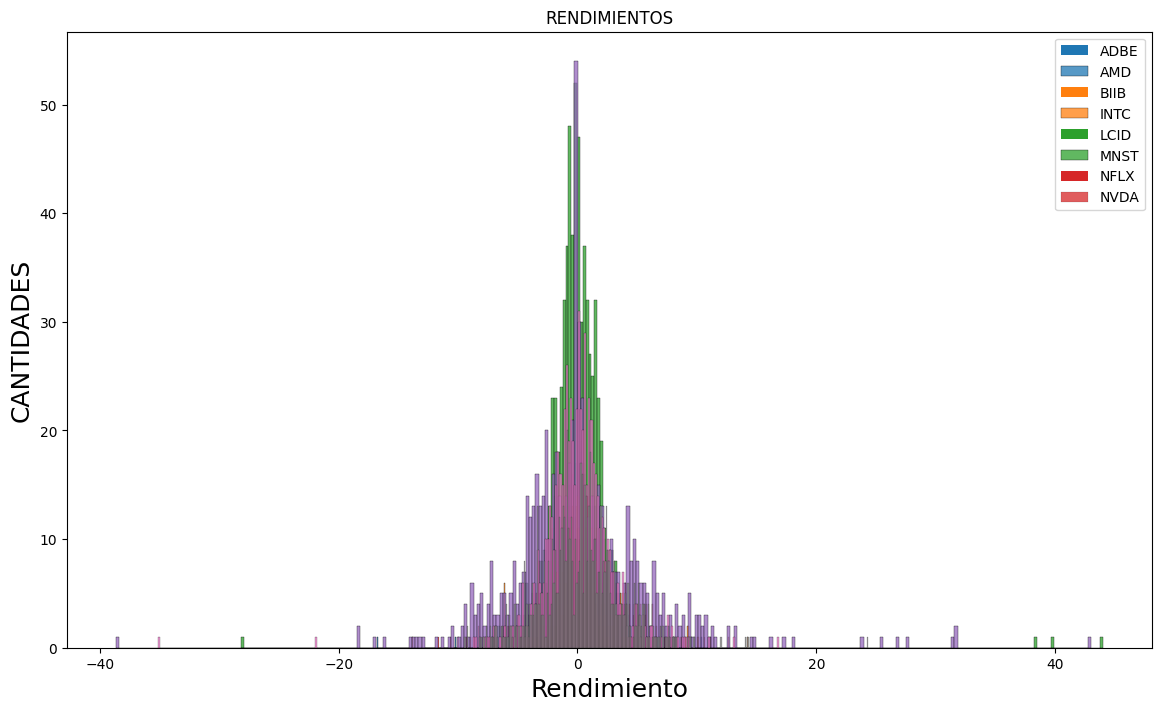

In [584]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [585]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
ADBE,0.000546,0.000470,0.000211,0.000238,0.000393,0.000174,0.000367,0.000538
AMD,0.000470,0.001056,0.000223,0.000377,0.000676,0.000177,0.000456,0.000893
BIIB,0.000211,0.000223,0.001174,0.000138,0.000286,0.000126,0.000247,0.000261
INTC,0.000238,0.000377,0.000138,0.000518,0.000311,0.000124,0.000252,0.000380
LCID,0.000393,0.000676,0.000286,0.000311,0.003710,0.000174,0.000466,0.000661
MNST,0.000174,0.000177,0.000126,0.000124,0.000174,0.000232,0.000133,0.000220
NFLX,0.000367,0.000456,0.000247,0.000252,0.000466,0.000133,0.001018,0.000515
NVDA,0.000538,0.000893,0.000261,0.000380,0.000661,0.000220,0.000515,0.001169


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [586]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

8

In [587]:
for x in range(5000):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [588]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

ADBE  ->  19.9 %
AMD  ->  3.28 %
BIIB  ->  2.41 %
INTC  ->  24.81 %
LCID  ->  14.43 %
MNST  ->  12.54 %
NFLX  ->  16.33 %
NVDA  ->  6.31 %


Va a tener el siguiente rendimiento:

In [589]:
str(round(rPortafolio[0], 5)*100) + ' %'

'0.052 %'

Tiene el siguiente riesgo (%):

In [590]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'2.1 %'

###Generación de diccionarios
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [591]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [592]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000519,0.020505,0.198965,0.032764,0.024052,0.248080,0.144288,0.125431,0.163316,0.063105
1,0.000551,0.021241,0.324315,0.124233,0.062169,0.213026,0.144503,0.067131,0.019743,0.044881
2,0.000880,0.020748,0.173440,0.147478,0.168541,0.039865,0.017747,0.117576,0.168921,0.166432
3,0.000945,0.021568,0.211630,0.014967,0.155780,0.075646,0.110433,0.089243,0.110898,0.231403
4,0.000592,0.021562,0.113068,0.152853,0.067220,0.180697,0.157442,0.111397,0.192227,0.025095
...,...,...,...,...,...,...,...,...,...,...
4995,0.000847,0.023897,0.107461,0.177464,0.072569,0.146333,0.164957,0.022744,0.166768,0.141704
4996,0.000962,0.022778,0.005325,0.086306,0.080708,0.095635,0.184131,0.186333,0.180758,0.180804
4997,0.000723,0.024371,0.026413,0.072786,0.192206,0.076519,0.250718,0.123829,0.222976,0.034552
4998,0.000994,0.021414,0.003791,0.109834,0.073898,0.149268,0.112817,0.187193,0.133142,0.230057


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

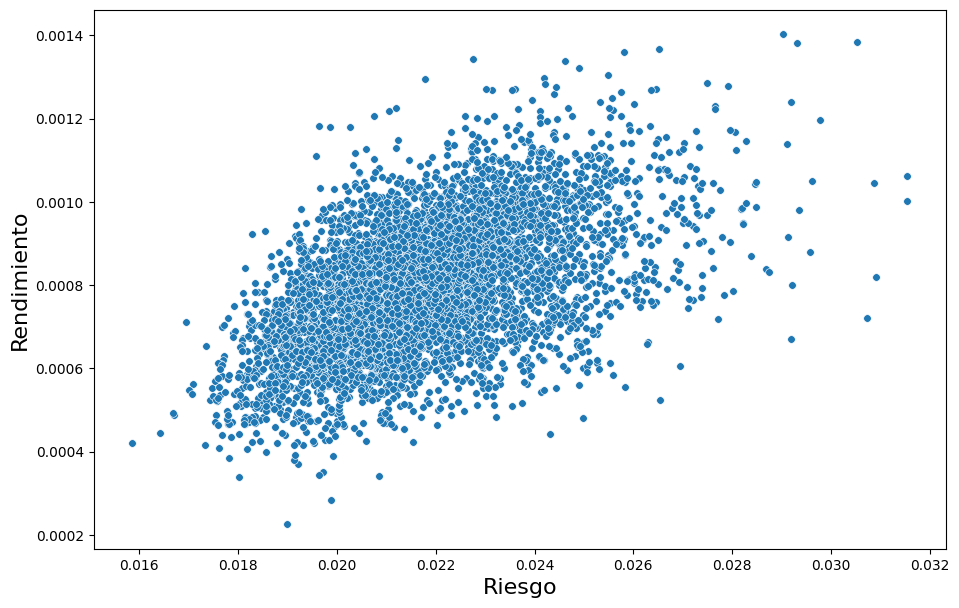

In [593]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [594]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.000420
Riesgo         0.015856
USD ADBE       0.241934
USD AMD        0.027277
USD BIIB       0.120229
USD INTC       0.219978
USD LCID       0.032961
USD MNST       0.343762
USD NFLX       0.008322
USD NVDA       0.005538
Name: 4563, dtype: float64

0.04199048253128033

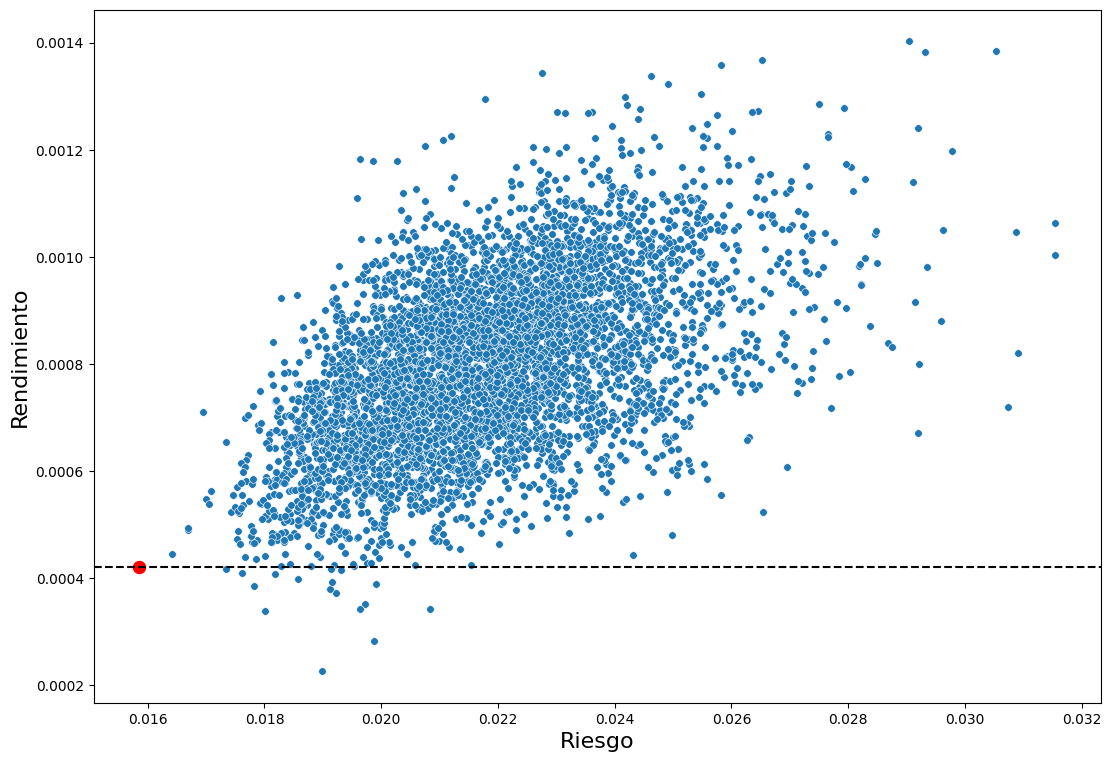

In [595]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas.
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [596]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.001403
Riesgo         0.029042
USD ADBE       0.086982
USD AMD        0.001065
USD BIIB       0.156701
USD INTC       0.010219
USD LCID       0.304751
USD MNST       0.063970
USD NFLX       0.001962
USD NVDA       0.374349
Name: 3756, dtype: float64

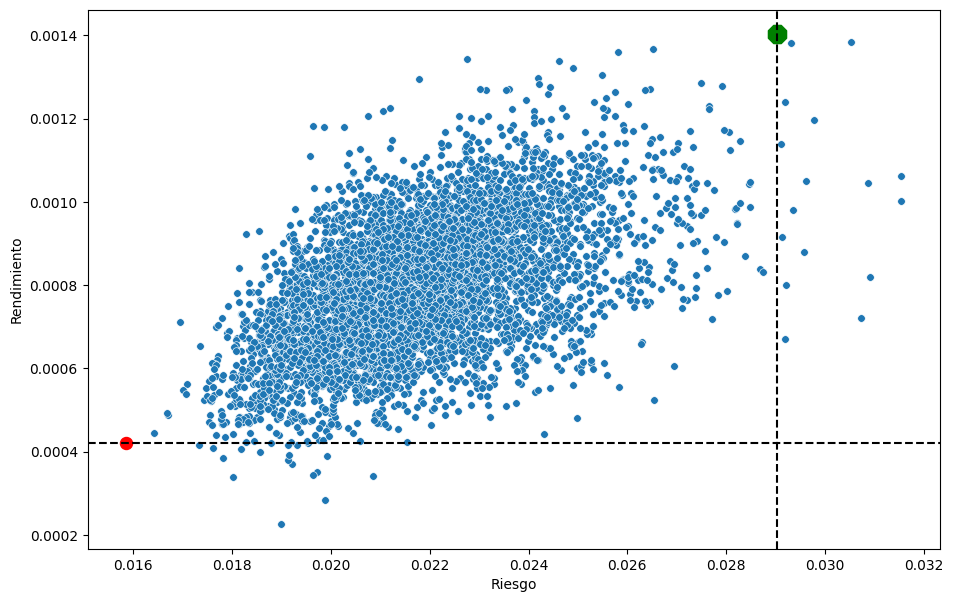

In [597]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [598]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

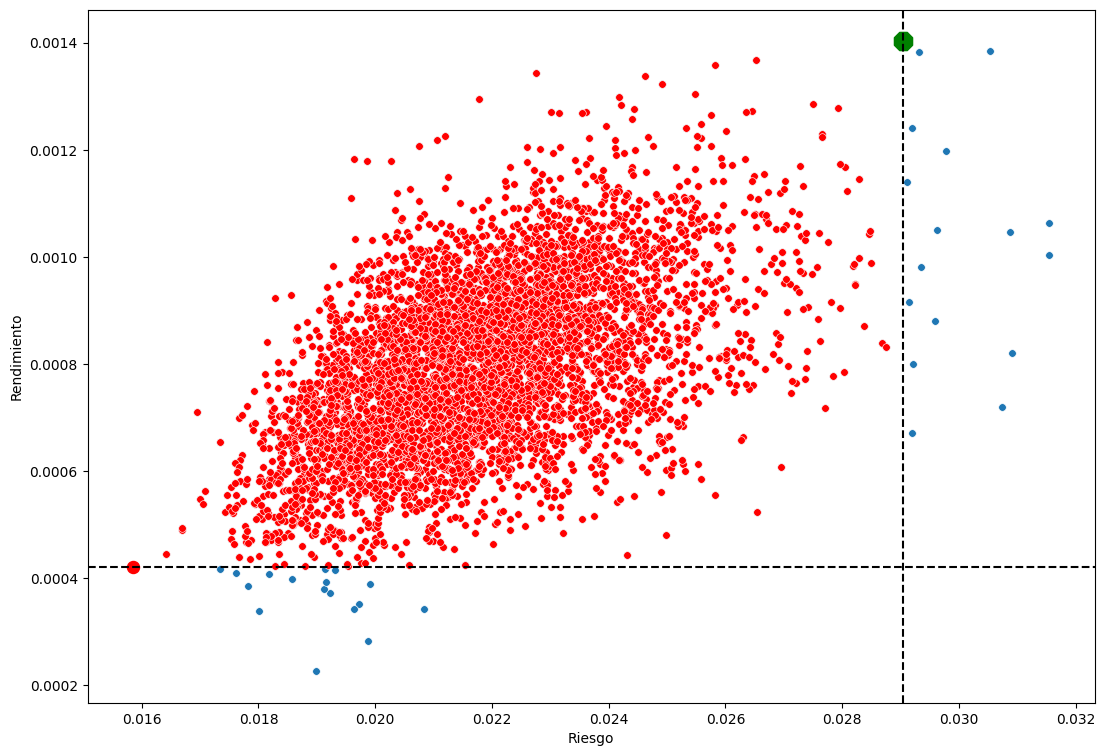

In [599]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [600]:
minimaVarianza

Rendimiento    0.000420
Riesgo         0.015856
USD ADBE       0.241934
USD AMD        0.027277
USD BIIB       0.120229
USD INTC       0.219978
USD LCID       0.032961
USD MNST       0.343762
USD NFLX       0.008322
USD NVDA       0.005538
Name: 4563, dtype: float64

In [601]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.07454074289594675
Punto de corte -0.0007619813316089598


In [602]:
'''x_vals, y_vals = [], []
for index, row in m.iterrows():
    x = row['Riesgo']
    y = row['Rendimiento']
    if y >= pendiente * x + b:
        x_vals.append(x)
        y_vals.append(y)
pendiente_optima = pd.DataFrame({'Riesgo': x_vals, 'Rendimiento': y_vals})'''

"x_vals, y_vals = [], []\nfor index, row in m.iterrows():\n    x = row['Riesgo']\n    y = row['Rendimiento']\n    if y >= pendiente * x + b:\n        x_vals.append(x)\n        y_vals.append(y)\npendiente_optima = pd.DataFrame({'Riesgo': x_vals, 'Rendimiento': y_vals})"

In [603]:
pendiente_optima = pd.DataFrame(columns = m.columns)
for index, row in m.iterrows():
    if row['Rendimiento'] >= pendiente * row['Riesgo'] + b:
       pendiente_optima = pendiente_optima.append(row)

pendiente_optima.reset_index(drop=True, inplace=True) ;

<ipython-input-603-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-603-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-603-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-603-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-603-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

In [604]:
pendiente_optima

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.000880,0.020748,0.173440,0.147478,0.168541,0.039865,0.017747,0.117576,0.168921,0.166432
1,0.000945,0.021568,0.211630,0.014967,0.155780,0.075646,0.110433,0.089243,0.110898,0.231403
2,0.001040,0.022112,0.216008,0.166462,0.116729,0.027743,0.100501,0.139605,0.021975,0.210977
3,0.000888,0.021476,0.197995,0.009339,0.197283,0.111359,0.105114,0.053564,0.107711,0.217635
4,0.001071,0.024189,0.055763,0.394991,0.009607,0.022988,0.073104,0.150956,0.135295,0.157295
...,...,...,...,...,...,...,...,...,...,...
1790,0.000914,0.022332,0.129783,0.179007,0.178730,0.082837,0.045787,0.017255,0.179773,0.186827
1791,0.000937,0.022478,0.000738,0.025200,0.085069,0.107599,0.204229,0.229803,0.167463,0.179899
1792,0.000767,0.019307,0.115509,0.180403,0.102262,0.083723,0.112421,0.283647,0.062012,0.060022
1793,0.000962,0.022778,0.005325,0.086306,0.080708,0.095635,0.184131,0.186333,0.180758,0.180804


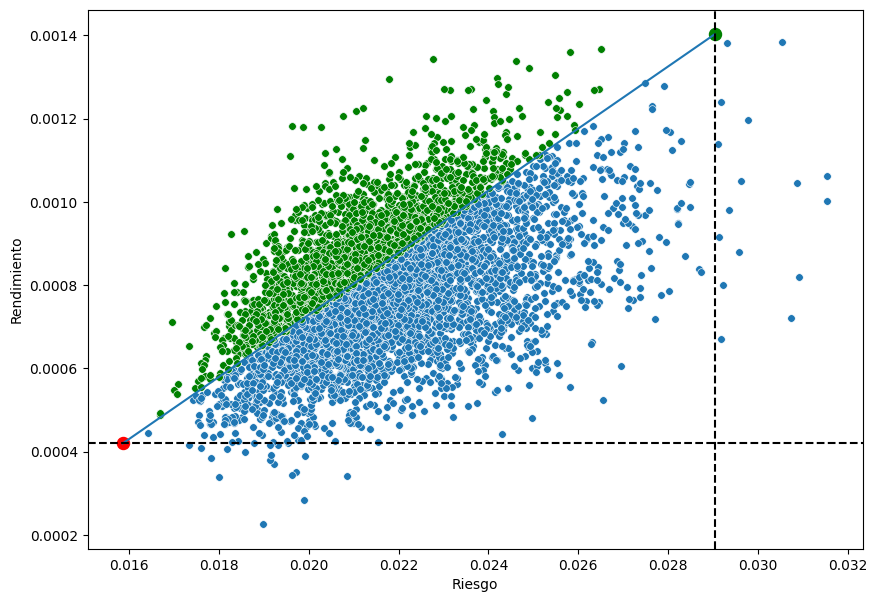

In [605]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

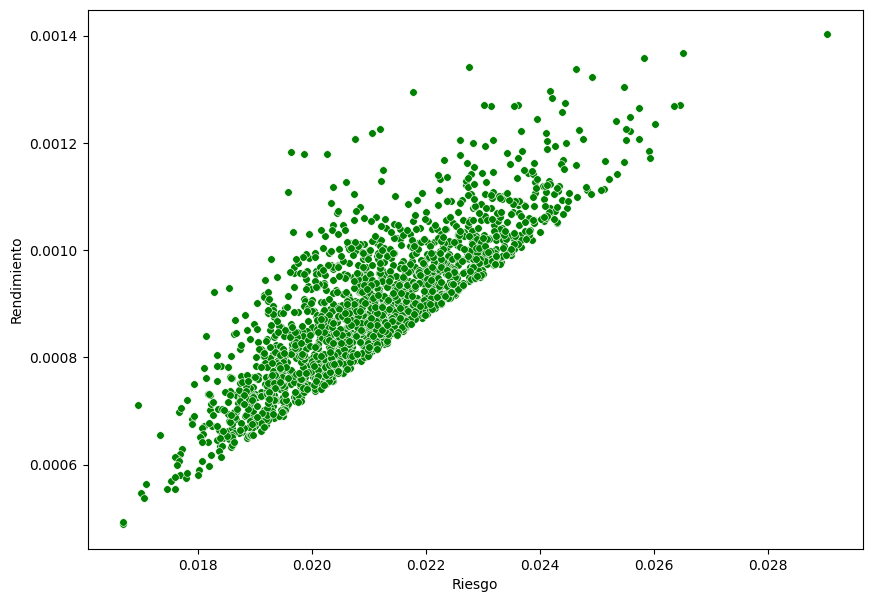

In [606]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [607]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

In [608]:
# Perfil Bajo
perfil_bajo = pendiente_optima[(pendiente_optima["Riesgo"] >= pendiente_optima["Riesgo"].min()) &
                 (pendiente_optima["Riesgo"] <= bajo)]
maximo_perfil_bajo = perfil_bajo.loc[perfil_bajo['Rendimiento'].idxmax()]
maximo_perfil_bajo_mensual = maximo_perfil_bajo.copy()
print(f"Máximo rendimiento para perfil bajo: \n {maximo_perfil_bajo} \n ---------------")

# Perfil Medio
perfil_medio = pendiente_optima[(pendiente_optima["Riesgo"] >= bajo) &
                 (pendiente_optima["Riesgo"] <= medio)]
maximo_perfil_medio = perfil_medio.loc[perfil_medio['Rendimiento'].idxmax()]
maximo_perfil_medio_mensual = maximo_perfil_medio.copy()
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_medio} \n ---------------")

# Perfil Alto
perfil_alto = pendiente_optima[pendiente_optima["Riesgo"] >= medio]
maximo_perfil_alto = perfil_alto.loc[perfil_alto['Rendimiento'].idxmax()]
maximo_perfil_alto_mensual = maximo_perfil_alto.copy()
print(f"Máximo rendimiento para perfil Alto: \n {maximo_perfil_alto} \n ---------------")

Máximo rendimiento para perfil bajo: 
 Rendimiento    0.001207
Riesgo         0.020751
USD ADBE       0.059117
USD AMD        0.039430
USD BIIB       0.051508
USD INTC       0.064598
USD LCID       0.021446
USD MNST       0.284364
USD NFLX       0.121080
USD NVDA       0.358457
Name: 1419, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Rendimiento    0.001342
Riesgo         0.022755
USD ADBE       0.065858
USD AMD        0.000715
USD BIIB       0.086771
USD INTC       0.055495
USD LCID       0.041377
USD MNST       0.167446
USD NFLX       0.139518
USD NVDA       0.442820
Name: 37, dtype: float64 
 ---------------
Máximo rendimiento para perfil Alto: 
 Rendimiento    0.001403
Riesgo         0.029042
USD ADBE       0.086982
USD AMD        0.001065
USD BIIB       0.156701
USD INTC       0.010219
USD LCID       0.304751
USD MNST       0.063970
USD NFLX       0.001962
USD NVDA       0.374349
Name: 1352, dtype: float64 
 ---------------


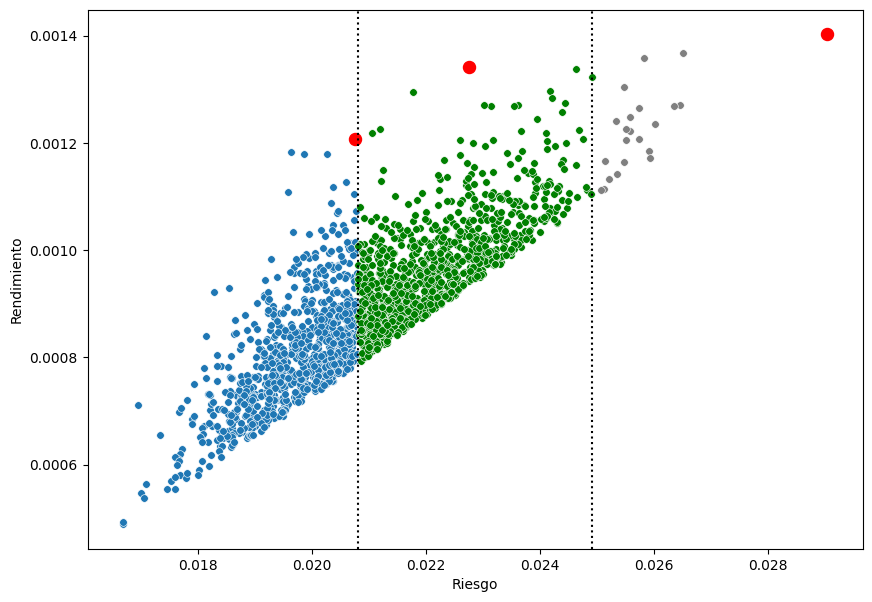

In [609]:
plt.figure(figsize=(10,7))

sns.scatterplot(data= perfil_bajo, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data= perfil_medio, x = 'Riesgo', y='Rendimiento', color='green', s=30)
sns.scatterplot(data= perfil_alto, x = 'Riesgo', y='Rendimiento', color='grey', s=30)

# Lineas verticales
plt.axvline(x=bajo, color='black', linestyle=':')
plt.axvline(x=medio, color='black', linestyle=':')

# Puntos máximos por perfil
plt.scatter(x=maximo_perfil_bajo[1], y=maximo_perfil_bajo[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_medio[1], y=maximo_perfil_medio[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_alto[1], y=maximo_perfil_alto[0], color='red', marker='.', s=300)

plt.show()

In [610]:
maximo_perfil_bajo = pd.DataFrame(maximo_perfil_bajo)
column_name = maximo_perfil_bajo.columns[0]
maximo_perfil_bajo.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_bajo['Total %'] = round(maximo_perfil_bajo['Total %'] * 100,2)
maximo_perfil_bajo['Total %'] = maximo_perfil_bajo['Total %'].astype(str) + " %"



In [611]:
maximo_perfil_medio = pd.DataFrame(maximo_perfil_medio)
column_name = maximo_perfil_medio.columns[0]
maximo_perfil_medio.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_medio['Total %'] = round(maximo_perfil_medio['Total %'] * 100,2)
maximo_perfil_medio['Total %'] = maximo_perfil_medio['Total %'].astype(str) + " %"


In [612]:
maximo_perfil_alto = pd.DataFrame(maximo_perfil_alto)
column_name = maximo_perfil_alto.columns[0]
maximo_perfil_alto.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_alto['Total %'] = round(maximo_perfil_alto['Total %'] * 100,2)
maximo_perfil_alto['Total %'] = maximo_perfil_alto['Total %'].astype(str) + " %"

In [613]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento DIARIO de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo.T)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio.T)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto.T)


--------------------------------------------------------
A continuación el rendimiento diario de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.12 %,2.08 %,5.91 %,3.94 %,5.15 %,6.46 %,2.14 %,28.44 %,12.11 %,35.85 %



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.13 %,2.28 %,6.59 %,0.07 %,8.68 %,5.55 %,4.14 %,16.74 %,13.95 %,44.28 %



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,0.14 %,2.9 %,8.7 %,0.11 %,15.67 %,1.02 %,30.48 %,6.4 %,0.2 %,37.43 %


In [614]:
# Perfil Bajo Mensual

maximo_perfil_bajo_mensual = pd.DataFrame(maximo_perfil_bajo_mensual)

column_name = maximo_perfil_bajo_mensual.columns[0]
maximo_perfil_bajo_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_bajo_mensual = maximo_perfil_bajo_mensual.T


# Perfil Medio Mensual

maximo_perfil_medio_mensual = pd.DataFrame(maximo_perfil_medio_mensual)

column_name = maximo_perfil_medio_mensual.columns[0]
maximo_perfil_medio_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_medio_mensual = maximo_perfil_medio_mensual.T

# Perfil Alto Mensual

maximo_perfil_alto_mensual = pd.DataFrame(maximo_perfil_alto_mensual)

column_name = maximo_perfil_alto_mensual.columns[0]
maximo_perfil_alto_mensual.rename(columns={column_name: "Total %"}, inplace=True)

maximo_perfil_alto_mensual = maximo_perfil_alto_mensual.T

# Promedio de días de los meses en el año
dias_de_meses = 30.41

maximo_perfil_bajo_mensual['Rendimiento'] = ((1 + maximo_perfil_bajo_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_medio_mensual['Rendimiento'] = ((1 + maximo_perfil_medio_mensual['Rendimiento'] ) ** dias_de_meses - 1)
maximo_perfil_alto_mensual['Rendimiento'] = ((1 + maximo_perfil_alto_mensual['Rendimiento'] ) ** dias_de_meses - 1)

maximo_perfil_bajo_mensual.loc['Total %'] = maximo_perfil_bajo_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_medio_mensual.loc['Total %'] = maximo_perfil_medio_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))
maximo_perfil_alto_mensual.loc['Total %'] = maximo_perfil_alto_mensual.loc['Total %'].apply(lambda x: "{:.2f}%".format(x * 100))



In [622]:
print(f'\n--------------------------------------------------------\nA continuación el rendimiento MENSUAL de cada cartera:\n--------------------------------------------------------\n')
print("INVERSIÓN TOTAL PARA PERFIL BAJO: \n")
display(maximo_perfil_bajo_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL MEDIO: \n")
display(maximo_perfil_medio_mensual)
print("\nINVERSIÓN TOTAL PARA PERFIL ALTO: \n")
display(maximo_perfil_alto_mensual)


--------------------------------------------------------
A continuación el rendimiento MENSUAL de cada cartera:
--------------------------------------------------------

INVERSIÓN TOTAL PARA PERFIL BAJO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.74%,2.08%,5.91%,3.94%,5.15%,6.46%,2.14%,28.44%,12.11%,35.85%



INVERSIÓN TOTAL PARA PERFIL MEDIO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.16%,2.28%,6.59%,0.07%,8.68%,5.55%,4.14%,16.74%,13.95%,44.28%



INVERSIÓN TOTAL PARA PERFIL ALTO: 



,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,4.36%,2.90%,8.70%,0.11%,15.67%,1.02%,30.48%,6.40%,0.20%,37.43%


In [623]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir la lista de acciones
activos = ["AMD", "LCID", "MNST", "BIIB", "NVDA"]

# Obtener los datos históricos de las acciones
data = yf.download(activos, start="2020-01-01", end="2022-12-31")["Adj Close"]

# Calcular los rendimientos diarios
returns = data.pct_change()

# Eliminar la primera fila (NaN) de los rendimientos
returns = returns.dropna()

# Definir la columna de predicción
target_column = "LCID"

# Dividir los datos en conjunto de entrenamiento y prueba
X = returns.drop(target_column, axis=1)
y = returns[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones para el próximo mes
next_month_data = yf.download(activos, start="2022-12-01", end="2022-12-31")["Adj Close"]
next_month_returns = next_month_data.pct_change().dropna()
next_month_features = next_month_returns.drop(target_column, axis=1)
print(next_month_features)
next_month_predictions = model.predict(next_month_features.iloc[:, :4].values)

# Imprimir las predicciones
print("Predicción de precio para el próximo mes:")
print(f"{target_column}: {next_month_predictions[0]}")

# Evaluar el rendimiento del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
                 AMD      BIIB      MNST      NVDA
Date                                              
2022-12-02 -0.032266 -0.009773  0.007651 -0.015115
2022-12-05 -0.018138 -0.020575 -0.017974 -0.015762
2022-12-06 -0.045504 -0.004372 -0.007145 -0.037508
2022-12-07 -0.001850  0.002333 -0.002070  0.008319
2022-12-08  0.004705 -0.010440  0.003062  0.065074
2022-12-09 -0.026678 -0.012902 -0.014773 -0.009785
2022-12-12  0.030325  0.018292  0.007797  0.031410
2022-12-13  0.013867  0.002237 -0.003769  0.030624
2022-12-14 -0.037962 -0.007520  0.014536 -0.022023
2022-12-15 -0.034818 -0.019408 -0.022080 -0.040851
2022-12-16 -0.016834  0.005433  0.011340 -0.022475
2022-12-19 -0.012536 -0.002105 -0.003572 -0.019130
2022-12-20  0.007122  0.011006  0.007369 -0.010397
2022-12-21  0.040430 -0.002261  0.007809  0.025863
2022-12-22 -0.056442 -0.021788 -0.011182 -0.07

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
